### Ćwiczenia projektowe 1.
Anna Marjankowska, Adrian Żyła

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, classification_report
import matplotlib.pyplot as plt
import math

### Zadanie 1. Pytania wstępne

* __W jakim celu dokonuje się podziału zbioru danych na zbiór uczący i testowy? W jaki sposób ten podział powinien zostać wykonany?__<br><br>
Podział na zbiór uczący i testowy umożliwia wytrenowanie modelu na danych trenignowych oraz przetestowania jego wydajności na danych testowych. <br>
Dane testowe powinny być nowe, wcześniej niewidziane przez model, ale powinny reprezentować rzeczywisty zestaw danych na których model będzie pracować, co onzacza, ze dane testowe pownny mieć ten sam rozkład cech co dane rzeczywiste. 
Dzięki danym testowym możemy nie tylko zbadać dokładność modelu ale również zidentyfikować obszary wymagające dopracowania. <br>
Podział powinien byc dokonany w sposób losowy. Częstą praktyką jest dokonanie podziału w proporcji $80/20$ lub $70/30$, co daje nam odpowiednio duży zbiór treningowy do wyuczenia wzorców oraz odpowiednio duży zbiór testowy, wystarczający do oceny modelu.

* __Czym jest macierz błędu?__<br><br>
Macierz błędu jest narzędziem stosowanym do _oceny jakości klasyfikacji_. Powstaje ona z przecięcia klasy prognozowanej oraz klasy faktycznie zaobserwowanej. Umożliwia zrozumienie, które rodzaje błędów są popełniane.
Macierz błędów składa się więc z 4 wartości:
    * True-Positive \( TP \) - poprawnie przewidziana klasa pozytywna.
    * True-Negative \( TN \) - poprawnie przewidziana klasa negatywna.
    * False-Positive \( FP \) - niepoprawnie przewidziana klasa pozytywna.
    * False-Negative \( FN \) - niepoprawnie przewidziana klasa negatywna.

* __Jaka jest różnica między dokładnością, czułością a specyficznością? Która z tych miar i w jakim przypadku jest ważniejsza. Podać przykłady.__<br><br>
    * Dokładność (ang. accuracy) - miara, która pokazuje udział prawidłowych predykcji wsród wszystkich predykcji. Na przykład, dokładność równa $0.81$ oznacza, że $81\%$ zostało poprawnie poprawnie przypisanych do klas przez nasz model.  
    $$
    \text{Dokładność} = \frac{TP + TN}{TP + TN + FP + FN}
    $$
    Dokładność jest przydatna, gdy liczba przypadków pozytywnych jak i negatywnych jest w przybliżeniu równa. 
    * Czułość (ang. recall) - pokazuje udział prawidłowo przewidzanych pozytywnych przypadków wśród rzeczywiście pozytywnych przypadków. Mówi o zdolności modelu do wykrywania _pozytywnych_ przypadków. Na przykład, czułość równa $0.81$ oznacza, że $81\%$ osób z udarem zostało poprawnie zidentyfikowanych przez nasz model.  
    $$
    \text{Czułość} = \frac{TP}{TP + FN}
    $$
    Czułość jest uzyteczna gdy zależy nam na wykrywaniu wszystkich pozytywnych przypadków, nawet jeśli oznacza to większą liczbę fałszywych alarmów. Dobrym przykładem jest nasz zbiór danych, gdzie zależy nam na wykryciu wszystkich zagrożeń udaru, ponieważ przeoczenie choroby jest znacznie bardziej szkodliwe, niż błędne ostrzeżenie.
    * Specyficzność (ang. spcificity) - pokazuje udział prawidłowo przewidzianych negatywnych przypadków wśród rzeczywiście negatywnych przypadków. Mówi o zdolności modelu do wykrywania _negatywnych_ przypadków. Na przykład, specyficzność równa $0.81$ oznacza, że $81\%$ osób bez udaru zostało poprawnie zidentyfikowanych przez nasz model.
    $$
    \text{Specyficzność} = \frac{TN}{TN + FP}
    $$
    Specyficzność odnajduje swoje zastosowanie w modelach, gdy zależy nam na uniknięciu liczby fałszywych alarmów. Przykładem moze być klasyfikacja wiadomości email jako SPAM - zależy nam na jak najmniejszej liczbie normalnych wiadomości oznaczonych jako SPAM. 


#### Zadanie 2. Metoda KNN

* __Jak działa metoda k-najbliższych sąsiadów?__<br><br>
Metoda KNN jest algorytmem klasyfikacyjnym jak i regresyjnym opartym na podobieństwie między punktami danych, identyfikując najbliższe obserwacje. Działa na zasadzie "głosowania" wsród $k$ najbliższych sąsiadów dla danej próbki.  
Dla klasyfikacji, próbka jest przypisana do klasy, do której należy większość jej $k$ najbliższych sąsiadów. W przypadku regresji obliczana jest średnia lub mediana z wartości $k$ najbliższych sąsiadów.
<br>

* __Czym jest k w metodzie KNN? Jak dobrać odpowiednią wartość k? Czy k powinno być liczbą parzystą, nieparzystą, czy nie ma to znaczenia?__<br><br>
Liczba $k$ oznacza liczbę najbliższych sąsiadów którzy biorą udział w klasyfikacji lub regresji.
Zazwyczaj dobranie liczby $k$ wymaga przetestowania różnych wartości $k$ oraz wybraniu tej, która daje najlepsze wyniki. Liczba $k$ nie powinna być zbyt mała, aby nie doprowadzić do nadmiernego dopasowania, oraz zbyt duża co może prowadzić do uogólnienia modelu.
W przypadku klasyfikacji binarnej, zaleca się aby $k$ było liczbą _nieparzystą_, tak aby uniknąć sytuacji w której liczba sąsiadów z dwóch klas jest sobie równa, co prowadzi do remisu i wymusza przeprowadzenie losowania w predykcji.
<br>

* __Czy w metodzie tej można wykorzystać i jeśli tak, to w jaki sposób zmienne kategoryczne?__<br><br>
W metodzie KNN można wykorzystać zmienne kategoryczne, wymaga to jednak zakodowania zmiennej kategorycznej na zmienną $0/1$ metodą _one-hot encoding_.
<br>
* __Czy standaryzacja danych jest wymagana w przypadku wykorzystywania metody k-najbliższych sąsiadów? Dlaczego tak/nie? Zastosować metodę KNN na danych bez standaryzacji i ze standaryzacją. Porównać uzyskane wyniki.__<br><br>
Standaryzacja danych jest wymagana przy stosowaniu metody KNN. Dzieje się tak, ponieważ algorytm KNN opiera się na odległościach między punktami. Różne skale cech mogą prowadzić do niepoprawnej dominacji nietórych cech nad innymi, mimo iż nie są one tak istotne w klasyfikacji/regresji. 

Przejdźmy teraz do wgrania zestawu danych oraz ich obróbki.

In [2]:
data = pd.read_csv('/Users/aniamarjankowska/Documents/IiE/I semestr/Machine Learning/Laby/stroke_zaj1.csv', sep = ';', decimal = ',')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data.shape # sprawdzam ile mamy wierszy oraz kolumn

(612, 11)

Zmienne *gender*, *ever_married*, *work_type*, *Residence_typy*, *avg_glucose_level* oraz *smoking_status* to zmienne jakościowe. Musimy więc je zamienić na zmienne binarne. 

Sprawdzmy najpierw jakie dokładnie wartości przyjmują zmienne jakościowe:

In [4]:
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(f"{col}: {data[col].unique()}")

gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [5]:
gender_dummies = pd.get_dummies(data['gender'], dtype = int, drop_first = True) # Ustawiamy zmienna drop_first na True, aby pominac jedna kolumnę, w celu uniknięcia wspólniowości zmiennych
ever_married_dummies = pd.get_dummies(data['ever_married'], dtype = int, drop_first = True)
work_type_dummies = pd.get_dummies(data['work_type'], dtype = int, drop_first = True)
residence_type_dummies = pd.get_dummies(data['Residence_type'], dtype = int, drop_first = True)
smoking_status_dummies = pd.get_dummies(data['smoking_status'], dtype = int, drop_first = True)

In [6]:
data = pd.concat([gender_dummies, data[['age', 'hypertension', 'heart_disease']], ever_married_dummies, work_type_dummies, 
        residence_type_dummies, data[['avg_glucose_level', 'bmi',]], smoking_status_dummies, data[['stroke']]], axis = 1)
data = data.rename(columns = {'Yes': 'ever_married'})
data.head()

,Male,age,hypertension,heart_disease,ever_married,Private,Self-employed,children,Urban,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,stroke
0,1,67,0,1,1,1,0,0,1,228.69,36.6,1,0,0,1
1,1,80,0,1,1,1,0,0,0,105.92,32.5,0,1,0,1
2,0,49,0,0,1,1,0,0,1,171.23,34.4,0,0,1,1
3,0,79,1,0,1,0,1,0,0,174.12,24.0,0,1,0,1
4,1,81,0,0,1,1,0,0,1,186.21,29.0,1,0,0,1


In [7]:
data.shape

(612, 15)

Podział na zbiór uczący oraz testowy w proporcji $70/30$:

In [8]:
X = data.iloc[:, 0:14]
y = data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Zbudujmy model przed standaryzacją danych:

In [9]:
# Budowa oraz trenowanie modelu: 
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)

# Predykcja na zbiorze uczącym oraz testowym:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

Zweryfikujemy dokładność modelu dla danych treningowych:

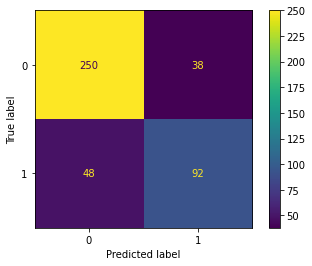

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       288
           1       0.71      0.66      0.68       140

    accuracy                           0.80       428
   macro avg       0.77      0.76      0.77       428
weighted avg       0.80      0.80      0.80       428

Dokładność modelu: 0.80
Czułość modelu: 0.66


In [10]:
# Macierz błędów dla zbioru treningowego:
dip = confusion_matrix(y_train, y_train_pred_knn)
disp = ConfusionMatrixDisplay(dip, display_labels = knn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych treningowych:
print(classification_report(y_train, y_train_pred_knn))
print(f"Dokładność modelu: {accuracy_score(y_train, y_train_pred_knn):0.2f}")
print(f"Czułość modelu: {recall_score(y_train, y_train_pred_knn):0.2f}")


Oraz dla danych testowych:

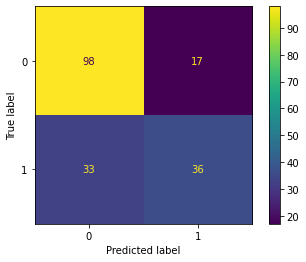

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       115
           1       0.68      0.52      0.59        69

    accuracy                           0.73       184
   macro avg       0.71      0.69      0.69       184
weighted avg       0.72      0.73      0.72       184

Dokładność modelu: 0.73
Czułość modelu: 0.52


In [11]:
# Macierz błędów dla zbioru testowego:
dip = confusion_matrix(y_test, y_test_pred_knn)
disp = ConfusionMatrixDisplay(dip, display_labels = knn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych testowych:
print(classification_report(y_test, y_test_pred_knn))
print(f"Dokładność modelu: {accuracy_score(y_test, y_test_pred_knn):0.2f}")
print(f"Czułość modelu: {recall_score(y_test, y_test_pred_knn):0.2f}")

Wykonajmy teraz standaryzację danych:

In [12]:
scaler = StandardScaler()
X_train[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_train[['age', 'avg_glucose_level', 'bmi']])
X_test[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test[['age', 'avg_glucose_level', 'bmi']])

Poszukajmy najlepszego $k$, na podstawie dokładności modelu.

In [13]:
k_values = range(1, 50)
accuracy_knn = []

In [14]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    accuracy_knn.append(accuracy_score(y_test, y_test_pred))

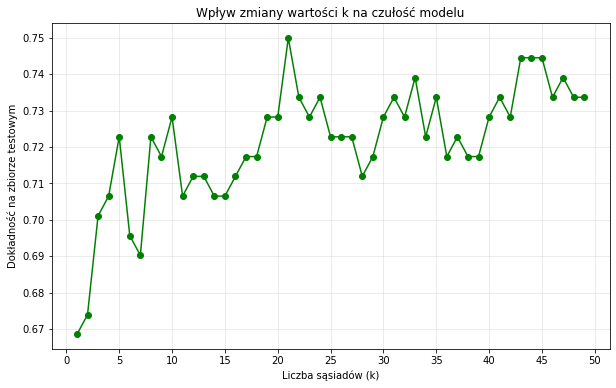

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_knn, marker = 'o', label = 'Czułość', color = 'green')
plt.xticks(range(0, 55, 5))
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność na zbiorze testowym')
plt.title('Wpływ zmiany wartości k na czułość modelu')
plt.grid(alpha = 0.3)
plt.show()

Zbudujmy model po standaryzacji danych:

In [16]:
# Budowa oraz trenowanie modelu: 
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)

# Predykcja na zbiorze uczącym oraz testowym:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)


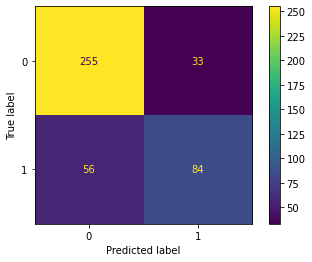

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       288
           1       0.72      0.60      0.65       140

    accuracy                           0.79       428
   macro avg       0.77      0.74      0.75       428
weighted avg       0.79      0.79      0.79       428

Dokładność modelu: 0.79
Czułość modelu: 0.60


In [17]:
# Macierz błędów dla zbioru treningowego:
dip = confusion_matrix(y_train, y_train_pred_knn)
disp = ConfusionMatrixDisplay(dip, display_labels = knn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych treningowych:
print(classification_report(y_train, y_train_pred_knn))
print(f"Dokładność modelu: {accuracy_score(y_train, y_train_pred_knn):0.2f}")
print(f"Czułość modelu: {recall_score(y_train, y_train_pred_knn):0.2f}")

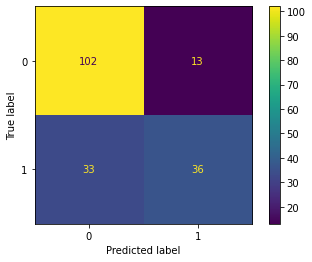

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       115
           1       0.73      0.52      0.61        69

    accuracy                           0.75       184
   macro avg       0.75      0.70      0.71       184
weighted avg       0.75      0.75      0.74       184

Dokładność modelu: 0.75
Czułość modelu: 0.52


In [18]:
# Macierz błędów dla zbioru testowego:
dip = confusion_matrix(y_test, y_test_pred_knn)
disp = ConfusionMatrixDisplay(dip, display_labels = knn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych testowych:
print(classification_report(y_test, y_test_pred_knn))
print(f"Dokładność modelu: {accuracy_score(y_test, y_test_pred_knn):0.2f}")
print(f"Czułość modelu: {recall_score(y_test, y_test_pred_knn):0.2f}")

Jak widzimy, dokładność oraz czułość modelu dla $k = 21$ zwiększyła się po przeprowadzeniu standaryzacji danych.  
Bez standaryzacji dokładność modelu była równa $80\%$ na danych treningowych i $73\%$ dla danych testowych.
Po standaryzacji model osiągnął dokładność na poziomie $79\%$ dla danych treningowych oraz $75\%$ dla danych testowych.  
Wynik jest __lepszy__ dla __danych po standaryzacji__.

#### Zadanie 3. Metoda KKNN

* __Co odróżnia metodę KKNN od metody KNN?__<br><br>
Metoda KKNN - inaczej ważona metoda $k$ najbliższych sąsiadów różni się od klasycznej metody KNN sposobem uwzględniania sąsiadów. W ważonej metodzie KNN sąsiedzi mają różne wagi w zależności od tego w jakiej odległości od próbki się znajdują, bliżsi sąsiedzi mają większy wpływ na wynik predykcji, niż Ci którzy znajdują się dalej od próbki. W klasycznej metodzie KNN każdy z sąsiadów ma równy wpływ na wynik klasyfikacji bądź regresji. 
<br><br>
* __Czy w metodzi tej występują ograniczenia dotyczące wyboru wartości k?__<br><br>
W metodzie KKNN obowiązują te same zasady co do wybnoru $k$ jak w przypadku klasycznej metody KNN. Ponieważ w ważonym KNN sąsiedzi dalej położeni mają mniejszy wpływ na wynik, większe wartości $k$ mogą być korzystniejsze niż w klasycznym KNN, bez ryzyka nadmiernego rozmycia granic klas.
<br><br>
* __Zastosować metodę KKNN i porównać wyniki z tymi z zadania 2.__

Zbudujmy model dla ważonej metody KNN:

In [19]:
kknn = KNeighborsClassifier(n_neighbors = 21, weights = 'distance') # waga to odleglość
kknn.fit(X_train, y_train)

y_train_pred_kknn = kknn.predict(X_train)
y_test_pred_kknn = kknn.predict(X_test)



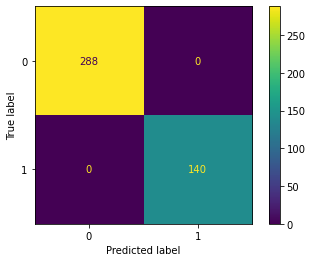

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       140

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Dokładność modelu: 1.00
Czułość modelu: 1.00


In [20]:
# Macierz błędów dla zbioru treningowego:
dip = confusion_matrix(y_train, y_train_pred_kknn)
disp = ConfusionMatrixDisplay(dip, display_labels = kknn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych treningowych:
print(classification_report(y_train, y_train_pred_kknn))
print(f"Dokładność modelu: {accuracy_score(y_train, y_train_pred_kknn):0.2f}")
print(f"Czułość modelu: {recall_score(y_train, y_train_pred_kknn):0.2f}")

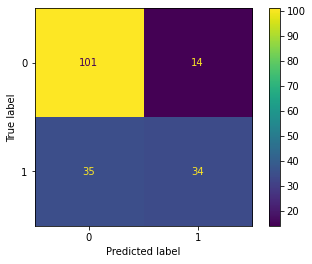

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       115
           1       0.71      0.49      0.58        69

    accuracy                           0.73       184
   macro avg       0.73      0.69      0.69       184
weighted avg       0.73      0.73      0.72       184

Dokładność modelu: 0.73
Czułość modelu: 0.49


In [21]:
# Macierz błędów dla zbioru testowego:
dip = confusion_matrix(y_test, y_test_pred_kknn)
disp = ConfusionMatrixDisplay(dip, display_labels = kknn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych testowych:
print(classification_report(y_test, y_test_pred_kknn))
print(f"Dokładność modelu: {accuracy_score(y_test, y_test_pred_kknn):0.2f}")
print(f"Czułość modelu: {recall_score(y_test, y_test_pred_kknn):0.2f}")

Porównanie wyników dla $k = 21$:
 
**Dla klasycznego KNN:**
- **$79\%$** dla zbioru uczącego i **$75\%$** dla zbioru testowego
 
**Dla KKNN:**
- **$100\%$** dla zbioru uczącego i **$74\%$** dla zbioru testowego
 
Zatem wynik dla __zbioru testowego__ otrzymaliśmy __gorszy__ dla ważonej metody KNN, natomiast metoda ta znacznie lepiej poradziła sobie ze zbiorem uczącym.

Spróbujmy zatem odszukać najlepszą wartość $k$ dla modelu KKNN bazując na dokładności modelu na zbiorze danych testowych.

In [22]:
k_values = range(1, 70)
accuracy_kknn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    
    accuracy_kknn.append(accuracy_score(y_test, y_test_pred))

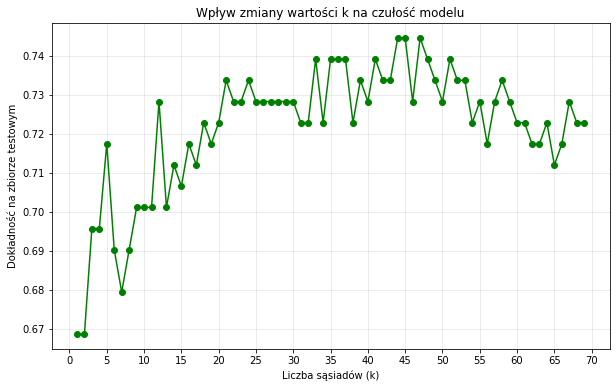

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_kknn, marker = 'o', label = 'Czułość', color = 'green')
plt.xticks(range(0, 75, 5))
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność na zbiorze testowym')
plt.title('Wpływ zmiany wartości k na czułość modelu')
plt.grid(alpha = 0.3)
plt.show()


Z wykresu możemy odczytać, że najwyższą dokładność modelu KKNN uzyskamy między innymi dla $k = 45$.

Zbudujmy model dla $k = 45$:

In [24]:
kknn = KNeighborsClassifier(n_neighbors = 45, weights = 'distance') # waga to odleglość
kknn.fit(X_train, y_train)

y_train_pred_kknn = kknn.predict(X_train)
y_test_pred_kknn = kknn.predict(X_test)

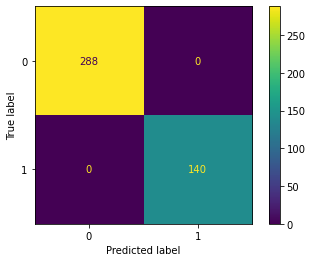

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       140

    accuracy                           1.00       428
   macro avg       1.00      1.00      1.00       428
weighted avg       1.00      1.00      1.00       428

Dokładność modelu: 1.00
Czułość modelu: 1.00


In [25]:
# Macierz błędów dla zbioru treningowego:
dip = confusion_matrix(y_train, y_train_pred_kknn)
disp = ConfusionMatrixDisplay(dip, display_labels = kknn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych treningowych:
print(classification_report(y_train, y_train_pred_kknn))
print(f"Dokładność modelu: {accuracy_score(y_train, y_train_pred_kknn):0.2f}")
print(f"Czułość modelu: {recall_score(y_train, y_train_pred_kknn):0.2f}")

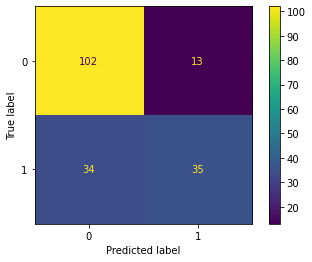

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       115
           1       0.73      0.51      0.60        69

    accuracy                           0.74       184
   macro avg       0.74      0.70      0.71       184
weighted avg       0.74      0.74      0.73       184

Dokładność modelu: 0.74
Czułość modelu: 0.51


In [26]:
# Macierz błędów dla zbioru testowego:
dip = confusion_matrix(y_test, y_test_pred_kknn)
disp = ConfusionMatrixDisplay(dip, display_labels = kknn.classes_)
disp.plot()
plt.show()

# Dokładność modelu na danych testowych:
print(classification_report(y_test, y_test_pred_kknn))
print(f"Dokładność modelu: {accuracy_score(y_test, y_test_pred_kknn):0.2f}")
print(f"Czułość modelu: {recall_score(y_test, y_test_pred_kknn):0.2f}")

Dokładność modelu dla $k = 45$ jest równa $74\%$ dla zbioru testowego, co daje nam lepszy wynik niż dla $k = 21$, ale wciąż gorszy niż uzyskany dla klasycznej metody KKN.  
Tak jak wcześniej wspominaliśmy, w metodzie KKNN większe wartości $k$ częściej znajdują zastosowanie niż w klasycznej metodzie KNN. Obserwacje, które są dalej od próbki mają mniejszych wpływ na predykcję, niż te, które znajdują się bliżej, co zmniejsza ryzyko rozmycia klas. 

### Zadanie 4. Regresja logistyczna

Zadanie 4. Regresja logistyczna

* __Jakie są założenie regresji logistycznej?__
    - Brak liniowości między zmienną zależną a zmiennymi niezależnymi  
    W przeciwieństwie do regresji liniowej, regresja logistyczna nie wymaga aby między zmienną objaśnianą a zmiennymi objaśniającymi istniała zależność liniowa.<br><br>
    - Brak współliniowości  
    W regresji logistycznej jak i wielu modelach liniowych, współliniowości może prowadzić do niestabilnych oszacowań parametrów oraz utrudnionej interpretowalności.<br><br>
    - Niezależność obserwacji  
    Oznacza to, że każda oberwacja w zbiorze danych jest statystycznie niezależna od pozostałych. Wartość jednej próby nie powinna wpływać na wartość innej próby.<br><br>
    - Zmienność danych  
    Rozkład reszt nie jest rozkładem normalnym, co różni regresję logistyczną od liniowej.<br><br>
    - Preferowany większy rozmiar próby  
    Regresja logistyczna daje wiarygodne i stabilne wyniki, gdy bierze się pod uwagę większy rozmiar próby zbioru danych.
    
* __Jak metoda ta radzi sobie ze zmiennymi kategorycznymi?__<br><br>
W regresji logistycznej zmienne kategoryczne należy zamienić na zmienne binarne, tzw. dummy variables, tak jak w przypadku metody KNN. Niemniej jednak duża ilość zmiennych kategorycznych może negatywnie wpływać na regresję logistyczną. W przypakach gdy każda zmienna ma wiele unikatowych wartości, może to prowadzić do problemu wysokiej wymiarowości, przez co model jest bardziej poddatny na przetrenowanie oraz wymaga większej liczby danych.<br>

* __Czy w przypadku regresji logistycznej konieczna jest standaryzacja danych?__<br><br>
Standaryzacja danych nie jest wymagana, ale jest zalecana w przypadku regresji logistycznej, gdy **zmienne mają różne skale** - standaryzacja sprawia, że modele szybciej osiągają zbieżność i są mniej podatne na dominację jednej zmiennej nad innymi. Standaryzacja może też poprawić interpretację współczynników i ułatwia porównanie zmiennych.<br>

* __Czy wartości odstające mają wpływ na uzyskiwane tą metodą wyniki?__<br><br>
Tak, wartości odstające mogą negatywnie wpływać na wyniki uzyskiwane metodą regresji logistycznej, dzieje się tak ponieważ metody optymalizacji (maksymalizacja funkcji prawdopodobieństwa) są wrażliwe na ekstremalne wartości.<br>

* __W jaki sposób należy interpretować wyniki (wartości parametrów) uzyskiwane w regresji logistycznej? Przedstawić i zinterpretować wartości parametrów uzyskane podczas budowy modelu regresji logistycznej.__<br><br>
Wartości parametrów uzyskane dla wytrenowanego modelu pokazują nam jaki indywidualny wpływ dana zmienna ma na prawdopodobieństwo przynależności do klasy pozytywnej. Gdy współczynnik przy zmiennej niezależnej jest dodatni zmienna zwiększa prawdopodobieństwo, natomiast ujemny współczynnik mówi nam, że zmienna zmniejsza prawdopodobieństwo przynależności do klasy pozytywnej. Wyraz wolny $\beta_0$ reprezentuje iloraz szans dla prawdopodobieństwa przynależności do klasy pozytywnej przy założeniu, że nie występują inne zmienne niezależne.

* __Co to jest próg odcięcia? Zweryfikować jak zmiana progu odcięcia wpływa na uzyskiwane wyniki.__<br><br>
Progiem odcięcia w modelu regresji logistycznej nazywamy wartość, powyżej której przypisujemy obserwację do jednej klasy, a poniżej której do drugiej klasy. Jest to punkt graniczny, który pozwala na dokonanie decyzji o przynależności danego obiektu do jednej z klas na podstawie wartości przewidywanego prawdopodobieństwa. Ustalenie punktu odcięcia jest szczególnie istotne, gdy mamy doczynienia z dysproporcją w danych. Dla domyślnego punktu odcięcia $0.5$ model często ignoruje klasę mniejszościową i częściej przypisuje obserwacje do klasy większościowej.  
Zmniejszenie punktu odcięcia powoduje częste klasyfikowanie obserwacji jako pozytywne, co prowadzi do zwiększenia czułości i w konsekwencji do zmniejszenia specyficzności. Natomiast zwiększenie wartości punktu odcięcia skutkuje częstym klasyfikowanie obserwacji jako negatywne, co w przeciwny sposób, zwiększa nam specyficzność i obniża czułość modelu.

Ponownie wczytujemy dane, oraz zamieniamy zmienne kateogryczne na zmienne binarne:

In [27]:
data = pd.read_csv('/Users/aniamarjankowska/Documents/IiE/I semestr/Machine Learning/Laby/stroke_zaj1.csv', sep = ';', decimal = ',')

gender_dummies = pd.get_dummies(data['gender'], dtype = int, drop_first = True)
ever_married_dummies = pd.get_dummies(data['ever_married'], dtype = int, drop_first = True)
work_type_dummies = pd.get_dummies(data['work_type'], dtype = int, drop_first = True)
residence_type_dummies = pd.get_dummies(data['Residence_type'], dtype = int, drop_first = True)
smoking_status_dummies = pd.get_dummies(data['smoking_status'], dtype = int, drop_first = True)

data = pd.concat([gender_dummies, data[['age', 'hypertension', 'heart_disease']], ever_married_dummies, work_type_dummies, 
        residence_type_dummies, data[['avg_glucose_level', 'bmi',]], smoking_status_dummies, data[['stroke']]], axis = 1)

data = data.rename(columns = {'Yes': 'ever_married'})

Dzielimy zbiór na zbiór uczący oraz testowy, w proporcji $70/30$:

In [28]:
X = data.drop("stroke", axis = 1)
y = data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Wykonujemy standaryzację danych:

In [29]:
scaler = StandardScaler()
X_train[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_train[['age', 'avg_glucose_level', 'bmi']])
X_test[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test[['age', 'avg_glucose_level', 'bmi']])

Budujemy model regresji liniowej dla punktu odcięcia $0.5$:

In [30]:
lr = LogisticRegression(max_iter = 3000) # ze względu na dużą liczę zmiennych kategorycznych, zwiększam max_iter na 3000
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [31]:
y_train_pred_lr = lr.predict(X_train)
y_train_proba_lr = lr.predict_proba(X_train)

y_test_pred_lr = lr.predict(X_test)
y_test_proba_lr = lr.predict_proba(X_test)

Wartości prawdopodobieństwa przynależności do klas $[0, 1]$ dla zbioru testowego:

In [32]:
print(y_test_proba_lr)

[[0.6283218  0.3716782 ]
 [0.93177235 0.06822765]
 [0.73172362 0.26827638]
 [0.97770513 0.02229487]
 [0.90984668 0.09015332]
 [0.60541513 0.39458487]
 [0.93429118 0.06570882]
 [0.51852871 0.48147129]
 [0.78030543 0.21969457]
 [0.97738593 0.02261407]
 [0.93371837 0.06628163]
 [0.84569481 0.15430519]
 [0.46306926 0.53693074]
 [0.17031936 0.82968064]
 [0.60787576 0.39212424]
 [0.97349404 0.02650596]
 [0.6772399  0.3227601 ]
 [0.86236481 0.13763519]
 [0.72314046 0.27685954]
 [0.75101238 0.24898762]
 [0.28871533 0.71128467]
 [0.86480276 0.13519724]
 [0.70277922 0.29722078]
 [0.86862284 0.13137716]
 [0.7853617  0.2146383 ]
 [0.98019595 0.01980405]
 [0.88901088 0.11098912]
 [0.53556436 0.46443564]
 [0.97134432 0.02865568]
 [0.98383305 0.01616695]
 [0.42951394 0.57048606]
 [0.91100442 0.08899558]
 [0.88639628 0.11360372]
 [0.97154512 0.02845488]
 [0.96935371 0.03064629]
 [0.91522811 0.08477189]
 [0.1726701  0.8273299 ]
 [0.25751468 0.74248532]
 [0.84491692 0.15508308]
 [0.33343896 0.66656104]


Wyniki predykcji dla zbioru testowego:

In [33]:
print(y_test_pred_lr)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0]


Sprawdźmy teraz jak wyglądają macierze błędów oraz dokładność modelu dla danych treningowych jak i testowych.

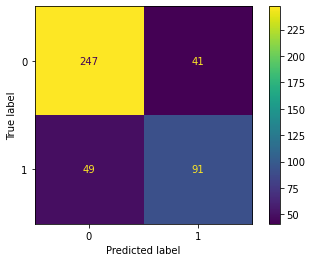

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       288
           1       0.69      0.65      0.67       140

    accuracy                           0.79       428
   macro avg       0.76      0.75      0.76       428
weighted avg       0.79      0.79      0.79       428

Dokładność modelu to: 0.79
Czułość modelu to: 0.65


In [34]:
# Macierz błędów dla danych treningowych
cm = confusion_matrix(y_train, y_train_pred_lr)
cmplot = ConfusionMatrixDisplay(cm, display_labels = lr.classes_)
cmplot.plot()
plt.show()

# Dokładność i czułość dla danych treningowych:
print(classification_report(y_train, y_train_pred_lr))
print(f"Dokładność modelu to: {accuracy_score(y_train, y_train_pred_lr):.2f}")
print(f"Czułość modelu to: {recall_score(y_train, y_train_pred_lr):.2f}")

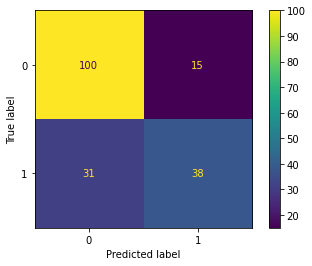

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       115
           1       0.72      0.55      0.62        69

    accuracy                           0.75       184
   macro avg       0.74      0.71      0.72       184
weighted avg       0.75      0.75      0.74       184

Dokładność modelu to: 0.75
Czułość modelu to: 0.55


In [35]:
# Macierz błędów dla danych testowych
cm = confusion_matrix(y_test, y_test_pred_lr)
cmplot = ConfusionMatrixDisplay(cm, display_labels = lr.classes_)
cmplot.plot()
plt.show()

# Dokładność i czułość dla danych testowych:
print(classification_report(y_test, y_test_pred_lr))
print(f"Dokładność modelu to: {accuracy_score(y_test, y_test_pred_lr):.2f}")
print(f"Czułość modelu to: {recall_score(y_test, y_test_pred_lr):.2f}")

In [36]:
coefficients = lr.coef_
intercept = lr.intercept_
print("Współczynniki:", coefficients)
print("Wyraz wolny:", intercept)

Współczynniki: [[ 0.20396225  1.49006479  0.74546017  0.24580576 -0.24610052  0.11995374
   0.06522074  0.41984758 -0.02245695  0.25537794 -0.10311852 -0.21536978
  -0.17718254  0.26812617]]
Wyraz wolny: [-1.16828543]


Dokładność modelu regresji logistycznej na danych treningowych wynosi $79\%$ a dla danych testowych $75\%$.

Przetestujmy teraz regresję logistyczną z innym punktem odcięcia.

In [37]:
y_train_proba_lr = lr.predict_proba(X_train)[:, 1] # Wybieramy tylko prawdopodobieństwa dla klasy 1
y_test_proba_lr = lr.predict_proba(X_test)[:, 1]  

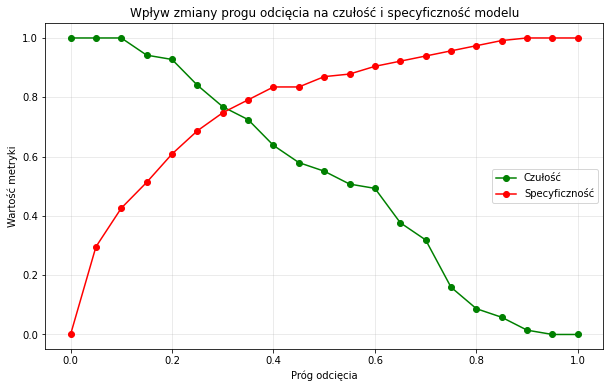

In [38]:
thresholds = np.arange(0, 1.05, 0.05) 
sensitivity_list = []
specificity_list = []
 
# Obliczenie czułości i specyficzności dla różnych progów
for threshold in thresholds:
    y_pred_threshold = (y_test_proba_lr >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
 
    sensitivity = tp / (tp + fn)  
    specificity = tn / (tn + fp)  #
 
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
 
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivity_list, marker='o', label='Czułość', color='green')
plt.plot(thresholds, specificity_list, marker='o', label='Specyficzność', color='red')
plt.xlabel('Próg odcięcia')
plt.ylabel('Wartość metryki')
plt.title('Wpływ zmiany progu odcięcia na czułość i specyficzność modelu')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Patrząć na wykres, możemy wysunąć wniosek, że próg odcięcia równy $0.3$ jest optymalny dla naszego modelu.

In [39]:
# Ustawiamy próg odcięcia = 0.3
threshold = 0.3
y_train_pred_custom = (y_train_proba_lr >= threshold).astype(int) # Jeśli prawdopodobieństwo >= threshold, przypisz 1, w przeciwnym razie 0
y_test_pred_custom = (y_test_proba_lr >= threshold).astype(int)  


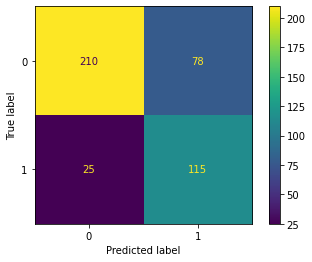

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       288
           1       0.60      0.82      0.69       140

    accuracy                           0.76       428
   macro avg       0.74      0.78      0.75       428
weighted avg       0.80      0.76      0.77       428

Dokładność modelu to: 0.76
Czułość modelu to: 0.82


In [40]:
# Macierz błędów dla danych treningowych
cm = confusion_matrix(y_train, y_train_pred_custom)
cmplot = ConfusionMatrixDisplay(cm, display_labels = lr.classes_)
cmplot.plot()
plt.show()

# Dokładność i czułość dla danych treningowych:
print(classification_report(y_train, y_train_pred_custom))
print(f"Dokładność modelu to: {accuracy_score(y_train, y_train_pred_custom):.2f}")
print(f"Czułość modelu to: {recall_score(y_train, y_train_pred_custom):.2f}")

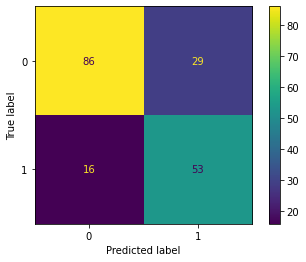

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       115
           1       0.65      0.77      0.70        69

    accuracy                           0.76       184
   macro avg       0.74      0.76      0.75       184
weighted avg       0.77      0.76      0.76       184

Dokładność modelu to: 0.76
Czułość modelu to: 0.77


In [41]:
# Macierz błędów dla danych testowych
cm = confusion_matrix(y_test, y_test_pred_custom)
cmplot = ConfusionMatrixDisplay(cm, display_labels = lr.classes_)
cmplot.plot()
plt.show()

# Dokładność i czułość dla danych testowych:
print(classification_report(y_test, y_test_pred_custom))
print(f"Dokładność modelu to: {accuracy_score(y_test, y_test_pred_custom):.2f}")
print(f"Czułość modelu to: {recall_score(y_test, y_test_pred_custom):.2f}")

Zmniejszenie progu odcięcia spowodowało __poprawę__ dokładności modelu. W przypadku progu odcięcięcia $0.5$ dokładność dla danych testowych wynosiła $75\%$, natomiast dla progu równego $0.3$ dokładność wynosi $76\%$.  
Zmniejszenie progu odcięcia wpływa również na poprawę czułości modelu, co jest istotne w przypadku predykcji chorób.  
Dodatkowo, mamy również dysproporcje klas w naszych danych - wiecej danych dla klasy $0$, a więc obniżenie progu jest w tym przypadku również korzystne. 

Przejdźmy teraz do analizy współczynników modelu.

In [42]:
coefficients = lr.coef_
intercept = lr.intercept_

In [43]:
feature_names = X.columns
 
coefficients = lr.coef_.flatten()
intercept = lr.intercept_[0]
 
coeff_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
 
intercept_row = pd.DataFrame({
    'Feature': ['Intercept (wyraz wolny)'],
    'Coefficient': [intercept]
})
 
coeff_table = pd.concat([coeff_table, intercept_row], ignore_index=True)
coeff_table


,Feature,Coefficient
0,Male,0.203962
1,age,1.490065
2,hypertension,0.745460
3,heart_disease,0.245806
4,ever_married,-0.246101
5,Private,0.119954
6,Self-employed,0.065221
7,children,0.419848
8,Urban,-0.022457
9,avg_glucose_level,0.255378


Interpretacja poszczególnych współczynników:
1. **Male $(0.20)$:**  
    Bycie mężczyzną zwiększa prawdopodobieństwo wystąpienia udaru. Dodatni współczynnik sugeruje, że płeć męska może być czynnikiem ryzyka.<br><br>
2. **age $(1.49)$:**  
    Każdy wzrost wieku zwiększa prawdopodobieństwo udaru. Jest to jeden z najbardziej wpływowych predyktorów, co wskazuje, że wiek ma duży wpływ na ryzyko.<br><br>
3. **hypertension $(0.75)$:**  
    Posiadanie nadciśnienia zwiększa ryzyko udaru. Dodatni współczynnik oznacza, że nadciśnienie jest czynnikiem ryzyka.<br><br>
4. **heart_disease $(0.25)$:**  
    Współistnienie chorób serca wiąże się z wyższym ryzykiem udaru. Wartość współczynnika jest dodatnia.<br><br>
5. **Is married $(-0.25)$:**  
    Bycie w związku małżeńskim obniża prawdopodobieństwo wystąpienia udaru. Może to wskazywać na wpływ czynników społecznych lub wsparcia partnerskiego.<br><br>
6. **Private $(0.12)$:**  
    Przynależność do sektora prywatnego pracy delikatnie zwiększa prawdopodobieństwo udaru.<br><br>
7. **Self-employed $(0.06)$:**  
    Bycie samozatrudnionym również nieznacznie zwiększa ryzyko udaru.<br><br>
8. **children $(0.42)$:**  
    Posiadanie dzieci zwiększa ryzyko udaru. Może to być związane z dodatkowymi czynnikami stresu lub stylem życia.<br><br>
9. **Urban $(-0.02)$:**  
    Mieszkanie na terenach miejskich zmniejsza prawdopodobieństwo udaru, jednak wpływ jest niewielki.<br><br>
10. **avg_glucose_level $(0.25)$:**  
    Wyższy średni poziom glukozy zwiększa prawdopodobieństwo udaru. Może wskazywać na rolę czynników metabolicznych.<br><br>
11. **bmi $(-0.10)$:**  
    Wyższy wskaźnik masy ciała BMI delikatnie zmniejsza prawdopodobieństwo udaru w tej próbce, co może wydawać się nieoczekiwane, ale może wskazywać na specyficzne zależności w danych.<br><br>
12. **formerly smoked $(-0.21)$:**  
    Osoby, które kiedyś paliły, mają nieco niższe ryzyko udaru w porównaniu do obecnych palaczy lub osób nigdy niepalących.<br><br>
13. **never smoked $(-0.18)$:**  
    Nigdy niepalący mają mniejsze ryzyko udaru niż obecni palacze.<br><br>
14. **smokes $(0.27)$:**  
    Palenie papierosów zwiększa prawdopodobieństwo wystąpienia udaru. Jest to znany czynnik ryzyka.<br><br>
15. **wyraz wolny $(-1.16)$:**  
    Przy założeniu, że nie występują inne zmienne niezależne, model przewiduje niskie prawdopodobieństwo wystąpienia udaru.<br><br>